<a href="https://colab.research.google.com/github/Jionee/AI_colorization/blob/main/Image_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Colorization

##### Importing Library


In [55]:
import os
import cv2
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

##### Mounting Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Loading Image Dataset

In [63]:
train_path = './drive/MyDrive/testData'
test_path = './drive/MyDrive/testValidation'
final_test_path = './drive/MyDrive/finalTest'
evaluate_path = './drive/MyDrive/testEvaluate'
evaluate_number = 12

#Normalize images
test_datagen = train_datagen = finalTest_datagen = evaluate_datagen = ImageDataGenerator(rescale=1./255)
#Resize images, if needed
train = train_datagen.flow_from_directory(train_path, target_size=(256,256),batch_size=300,class_mode=None)
test = test_datagen.flow_from_directory(test_path, target_size=(256,256),batch_size=100,class_mode=None)
finalTest = finalTest_datagen.flow_from_directory(final_test_path, target_size=(256,256),batch_size=100,class_mode=None)
evaluateTest = evaluate_datagen.flow_from_directory(evaluate_path, target_size=(256,256),batch_size=evaluate_number,class_mode=None)

#Convert from RGB to LAB
def generateDataset(imgs):
  X = []
  Y = []
  for img in imgs[0]:
    try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128) #for normalize -1 to 1
    except:
      print('error')
  X = np.array(X)
  Y = np.array(Y)
  X = X.reshape(X.shape+(1,)) #X and Y dimension should be same
  return [X,Y]
  
[X_train,Y_train] = generateDataset(train)
[X_test,Y_test] = generateDataset(test)
[X_final_test,Y_final_test] = generateDataset(finalTest)
[X_evaluate_test,Y_evaluate_test] = generateDataset(evaluateTest)

Found 300 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.
Found 12 images belonging to 1 classes.


##### Constructing Model

In [45]:
from keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from keras.optimizers import Adam

inputs = Input(shape=(256,256,1))
x = inputs

# encoder

# x = Conv2D(8, 3, padding='same')(x)
# x= BatchNormalization()(x)
# x = Activation('relu')(x)

# x = Conv2D(16, 3, padding='same',strides=2)(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x) 
# #x = MaxPooling2D(2)(x)
# x = Conv2D(16, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Conv2D(32, 3, padding='same',strides=2)(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# #x = MaxPooling2D(2)(x)
# x = Conv2D(64, 3, padding='same')(x)
# x= BatchNormalization()(x)
# x = Activation('relu')(x) 
# x = Conv2D(64, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = MaxPooling2D(2)(x)
# x = Conv2D(128, 3, padding='same')(x)
# x= BatchNormalization()(x)
# x = Activation('relu')(x) 
# x = Conv2D(256, 3, padding='same')(x)
# x= BatchNormalization()(x)
# x = Activation('relu')(x) 

# # decoder
# x = Conv2D(128, 3, padding='same')(x)
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Conv2D(64, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = UpSampling2D(2)(x)
# x = Conv2D(64, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Conv2D(32, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = UpSampling2D(2)(x)
# x = Conv2D(16, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Conv2D(16, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('relu')(x)
# x = UpSampling2D(2)(x)
# x = Conv2D(2, 3, padding='same')(x) 
# x= BatchNormalization()(x)
# x = Activation('tanh')(x)

x = Conv2D(8, 3, activation='relu', padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)  
x = MaxPooling2D(2)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x) 
x = Conv2D(32, 3, activation='relu', padding='same')(x) 
x = MaxPooling2D(2)(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x) 
x = Conv2D(64, 3, activation='relu', padding='same')(x) 
x = MaxPooling2D(2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x) 
x = Conv2D(256, 3, activation='relu', padding='same')(x) 

# decoder
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x) 
x = UpSampling2D(2)(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x) 
x = Conv2D(32, 3, activation='relu', padding='same')(x) 
x = UpSampling2D(2)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x) 
x = Conv2D(16, 3, activation='relu', padding='same')(x) 
x = UpSampling2D(2)(x)
x = Conv2D(2, 3, activation='tanh', padding='same')(x) 
x= BatchNormalization()(x)

outputs = x
model = Model(inputs, outputs)
LEARNING_RATE = 0.0001
model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 256, 256, 8)       80        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 16)      2320      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)       

##### Model Training

In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min',verbose=1, save_best_only=True)

fitModel = model.fit(X_train,Y_train, epochs=700, batch_size=20, validation_data=(X_test,Y_test),callbacks=[es,mc])



Epoch 1/700
15/15 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.7756WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0077s vs `on_test_batch_end` time: 0.0132s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 0.01275, saving model to best_model.h5
15/15 [==============================] - 1s 85ms/step - loss: 0.0027 - accuracy: 0.7756 - val_loss: 0.0127 - val_accuracy: 0.5625
Epoch 2/700
15/15 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.8016
Epoch 00002: val_loss improved from 0.01275 to 0.01202, saving model to best_model.h5
15/15 [==============================] - 1s 71ms/step - loss: 0.0018 - accuracy: 0.8016 - val_loss: 0.0120 - val_accuracy: 0.5838
Epoch 3/700
15/15 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.7986
Epoch 00003: val_loss did not improve from 0.01202
15/15 [==============================] - 1s 64ms/step - loss: 0

##### Plotting Accuracy


In [47]:
'''
def visModel():
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['accuracy'])
  plt.plot(fitModel.history['val_accuracy'])
  plt.legend(['training', 'validation'], loc = 'upper left')
  plt.show()
'''
def visLoss():
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['loss'])
  plt.plot(fitModel.history['val_loss'])
  plt.legend(['loss','val_loss'], loc = 'upper left')
  plt.show()

def visAccuracy():
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['accuracy'])
  plt.plot(fitModel.history['val_accuracy'])
  plt.legend(['accuracy', 'val_accuracy'], loc = 'upper left')
  plt.show()


##### Model Save & Caculating Accuracy

4/4 [==============================] - 0s 19ms/step - loss: 0.0123 - accuracy: 0.6132
Test accuracy:  [0.012320701032876968, 0.6132058501243591]


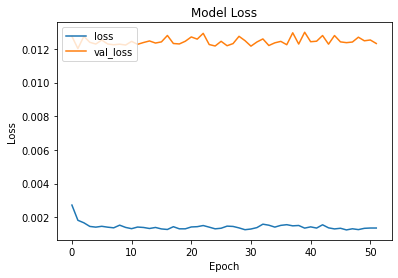

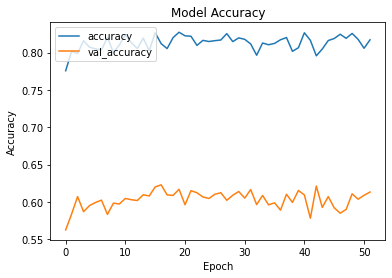

INFO:tensorflow:Assets written to: ./drive/MyDrive/test/model10.model/assets


In [58]:
#model_accuracy
results = model.evaluate(X_test, Y_test)

print('Test accuracy: ', results)

#visualization Model
visLoss()
visAccuracy()

#save
modelPath = './drive/MyDrive/test/model10.model'
model.save(modelPath)

##### PSNR 

In [49]:
import math
import numpy

# def calPSNR (img1,img2):
#   mse=numpy.mean((img1-img2)**2)
#   if mse==0:
#     return 100
#   PIXEL_MAX=255.0
#   return 20*math.log10(PIXEL_MAX/math.sqrt(mse))

  # 케라스 psnr 평가 metric 예시
def calPSNR(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)




##### Result Images

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 8 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 15 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


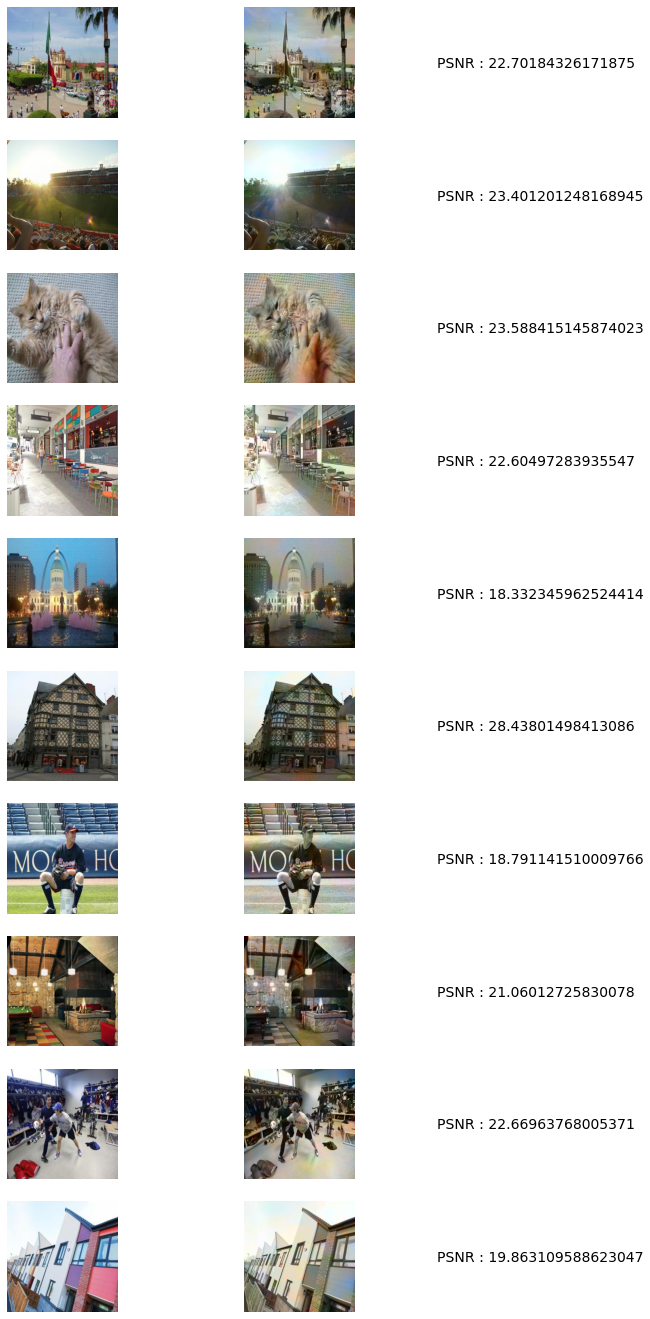

In [99]:
modelPath = './drive/MyDrive/test/model1.model'
model = tf.keras.models.load_model(
    modelPath,
    custom_objects=None,
    compile=True
)

#==========================final_test===================================
# output = model.predict(X_final_test)
# output = output*128 # (1, 256, 256, 2)

# result = np.zeros((100,256,256,3))
# result[:,:,:,0] = X_final_test[:,:,:,0] #L
# result[:,:,:,1:] = output#AB
# pred_Imgs = [lab2rgb(result[i]) for i in range(100)]

# storePath="./drive/MyDrive/result/num"
# for k in pred_Imgs
#   imsave(storePath+k+'.png',lab2rgb(result))
# # imsave("result.png",lab2rgb(result))

# plt.figure(figsize=(12,24))
# plt.title("Test vs Predicted Test")
# i=1
# for j in range(10):
#   #j=j+1
#   j = np.random.randint(0,99)
#   plt.subplot(10,3,i)
#   plt.axis('off')
#   plt.imshow(finalTest[0][j])
#   plt.subplot(10,3,i+1)
#   plt.axis('off')
#   plt.imshow(pred_Imgs[j])
#   #plt.imshow(Y_test[0])
#   plt.subplot(10,3,i+2)
#   plt.axis('off')

#   #PSNR = calPSNR(finalTest[0], pred_Imgs)
#   PSNR = calPSNR(finalTest[0][j],pred_Imgs[j])
#   plt.text(0,0.45,f"PSNR : {PSNR}",fontsize=14)
#   i += 3

#==========================test===================================

# output = model.predict(X_test)
# output = output*128 # (1, 256, 256, 2)

# result = np.zeros((100,256,256,3))
# result[:,:,:,0] = X_test[:,:,:,0] #L
# #result[:,:,:,1:] = Y_test[:,:,:,0:] *128 #AB
# #result[:,:,:,1] = Y_test[:,:,:,0] *128 #AB
# # result[:,:,:,2] = Y_test[:,:,:,1] *128 #AB
# #result[:,:,:,1] = output[:,:,:,0] *128 #AB
# #result[:,:,:,2] = output[:,:,:,1] *128 #AB
# result[:,:,:,1:] = output#AB
# pred_Imgs = [lab2rgb(result[i]) for i in range(100)]
# # imsave("result.png",lab2rgb(result))

# plt.figure(figsize=(12,24))
# plt.title("Test vs Predicted Test")
# i=1
# for j in range(10):
#   #j=j+1
#   j = np.random.randint(0,99)
#   #j=2
#   plt.subplot(10,3,i)
#   plt.axis('off')
#   plt.imshow(test[0][j])
#   plt.subplot(10,3,i+1)
#   plt.axis('off')
#   plt.imshow(pred_Imgs[j])
#   #plt.imshow(Y_test[0])
#   plt.subplot(10,3,i+2)
#   plt.axis('off')

#   PSNR = calPSNR(test[0][j],pred_Imgs[j])
#   plt.text(0,0.45,f"PSNR : {PSNR}",fontsize=14)
#   i += 3

#==========================train===================================

# output = model.predict(X_train)
# output = output*128 # (1, 256, 256, 2)

# result = np.zeros((300,256,256,3))
# result[:,:,:,0] = X_train[:,:,:,0] #L
# result[:,:,:,1:] = output#AB
# pred_Imgs = [lab2rgb(result[i]) for i in range(300)]
# # imsave("result.png",lab2rgb(result))

# plt.figure(figsize=(6,12))
# plt.title("Test vs Predicted Test")
# i=1
# for j in range(5):
#   #j=j
#   j = np.random.randint(0,99)
#   plt.subplot(5,3,i)
#   plt.axis('off')
#   plt.imshow(train[0][j])
#   plt.subplot(5,3,i+1)
#   plt.axis('off')
#   plt.imshow(pred_Imgs[j])
#   plt.subplot(5,3,i+2)
#   plt.axis('off')

#   PSNR = calPSNR(train[0][j],pred_Imgs[j])
#   plt.text(0,0.45,f"PSNR : {PSNR}",fontsize=14)
#   i += 3
  
#==========================Evaluate_test===================================
output = model.predict(X_evaluate_test)
output = output*128 # (1, 256, 256, 2)

result = np.zeros((evaluate_number,256,256,3))
result[:,:,:,0] = X_evaluate_test[:,:,:,0] #L
result[:,:,:,1:] = output#AB
pred_Imgs = [lab2rgb(result[i]) for i in range(evaluate_number)]

storePath="./drive/MyDrive/result/num"
for k in range(evaluate_number):
  imsave(storePath+str(k)+'.png',pred_Imgs[k])

plt.figure(figsize=(12,24))
plt.title("Test vs Predicted Test")
i=1
j=0
for j in range(10):
  
  #j = np.random.randint(0,evaluate_number-1)
  plt.subplot(10,3,i)
  plt.axis('off')
  plt.imshow(evaluateTest[0][j])
  plt.subplot(10,3,i+1)
  plt.axis('off')
  plt.imshow(pred_Imgs[j])
  #plt.imshow(Y_test[0])
  plt.subplot(10,3,i+2)
  plt.axis('off')

  PSNR = calPSNR(evaluateTest[0][j],pred_Imgs[j])
  plt.text(0,0.45,f"PSNR : {PSNR}",fontsize=14)
  i += 3
  j += 1

In [97]:
def AveragePSNR(pred_Imgs, test):
  psnr = 0.0
  for i in range(len(pred_Imgs)):
    psnr += calPSNR(pred_Imgs[i],test[i])
  print(f"Average PSNR : {psnr/len(pred_Imgs)}") 

AveragePSNR(pred_Imgs, evaluateTest[0])
#AveragePSNR(pred_Imgs, finalTest[0])
#AveragePSNR(pred_Imgs, test[0])
#AveragePSNR(pred_Imgs, train[0])

Average PSNR : 22.519208908081055
